In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii

In [4]:
CAT = pickle.load(open(f'pickle/cat101_150.pk','rb'))

In [32]:
bounds = pickle.load(open('./pickle/bounds.pk','rb'))

In [5]:
CAT[133]

RA,Dec,iccd,xg,yg,g,dg,ig,xi,yi,i,di,ii,ia,field
float64,float64,int32,float64,float64,float64,float64,int32,float64,float64,float64,float64,int32,int32,int32
1.0128374999999998,36.43767222222222,1,785.91,541.07,14.005,0.001,-9,678.72,543.01,12.901,0.001,-9,0,133
1.0487499999999983,36.37831944444444,1,1342.38,1698.47,14.084,0.001,-9,1245.65,1695.06,13.198,0.001,-9,0,133
1.0951958333333316,36.392575,1,2078.4,1411.83,14.079,0.001,-9,1978.71,1402.16,13.099,0.001,-9,0,133
1.0806125000000009,36.43597777777777,1,1855.4,563.06,14.119,0.001,-9,1747.95,555.63,13.194,0.001,-9,0,133
0.9879291666666674,36.357625,1,380.91,2111.16,14.157,0.001,-9,288.39,2115.87,13.034,0.001,-9,0,133
1.0602208333333323,36.412575,1,1529.03,1025.82,14.166,0.001,-9,1426.0,1021.09,13.141,0.001,-9,0,133
0.9690666666666665,36.40425833333333,1,91.28,1201.98,14.208,0.001,-9,-9.52,1209.56,34.885,7.953,0,0,133
1.065175,36.38341388888889,1,1602.47,1596.26,14.206,0.001,-9,1504.68,1590.59,13.321,0.001,-9,0,133
1.0423583333333326,36.25856944444445,1,1225.57,4035.07,14.46,0.001,-9,1150.47,4031.71,13.516,0.001,-9,0,133


In [3]:
master_cat = pd.read_csv('./catdata/master_catalog_jan_2023.csv') #2184 objects long

In [4]:
master_cat.head()

,ID,RADEG,DECDEG,CLASS,DATATABLE
0,C1,0.157917,32.417778,2.0,di_tullio_zinn_13_table2
1,2M034,0.508375,51.606722,4.0,m31rbcV5
2,PAndAS-03,0.985042,40.888667,1.0,huxor14_table1
3,PAndAS-04,1.178875,47.361797,1.0,huxor14_table1
4,PAndAS-05,1.350625,43.926583,1.0,huxor14_table1


In [5]:
gcs = master_cat[master_cat['CLASS'] == 1]

In [21]:
gcs[gcs.ID=='Hodge-III']

,ID,RADEG,DECDEG,CLASS,DATATABLE
75,Hodge-III,8.313333,48.456417,1.0,veljanoski13_table2


In [42]:
# create a filter for objects in CAT which are closer than delta to their corresponding master_cat object
filter1 = gcs[gcs['DECDEG']<50]['DECDEG'] > 47.5 # what value of delta???????? how much RA/Dec dist is allowed

# apply the filter
test_ = gcs[gcs['DECDEG']<50][filter1]

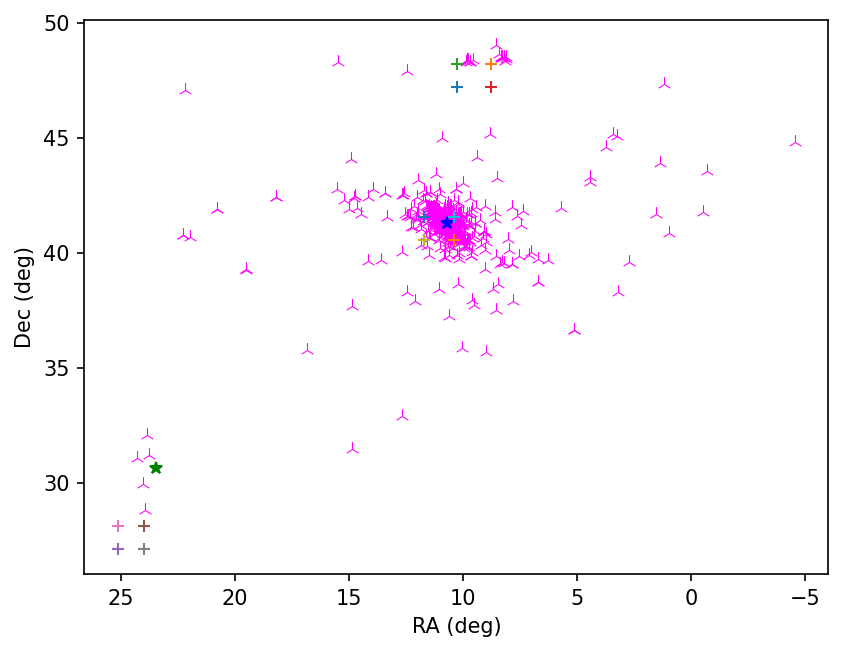

In [49]:
plt.figure(dpi=150)

ravals = []
for i in gcs['RADEG']:
    ravals += [(i+180)%360-180]

plt.scatter(ravals,gcs['DECDEG'],s=50,c='#fc00fc',marker='2',linewidths=0.5)
plt.plot(10.7,41.3,'b*')
plt.plot(23.46,30.65,'g*')

plt.plot(f382[0],f382[2],'+')
plt.plot(f382[1],f382[3],'+')
plt.plot(f382[0],f382[3],'+')
plt.plot(f382[1],f382[2],'+')

plt.plot(bounds[1][0],bounds[1][2],'+')
plt.plot(bounds[1][1],bounds[1][3],'+')
plt.plot(bounds[1][0],bounds[1][3],'+')
plt.plot(bounds[1][1],bounds[1][2],'+')

plt.plot(bounds[248][0],bounds[248][2],'+')
plt.plot(bounds[248][1],bounds[248][3],'+')
plt.plot(bounds[248][0],bounds[248][3],'+')
plt.plot(bounds[248][1],bounds[248][2],'+')

plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
#plt.ylim([28,55])
#plt.xlim([-6,26])
plt.gca().invert_xaxis()
plt.savefig('gc_positions.png', transparent=True)

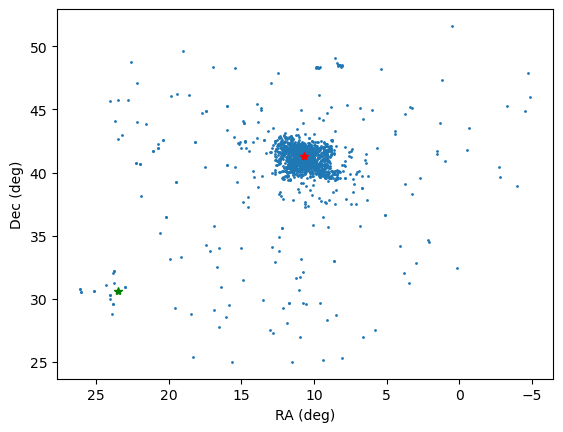

In [16]:
ravals = []
for i in master_cat['RADEG']:
    ravals += [(i+180)%360-180]

plt.scatter(ravals,master_cat['DECDEG'],s=1)
plt.plot(10.7,41.3,'r*')
plt.plot(23.46,30.65,'g*')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
#plt.ylim([28,55])
#plt.xlim([-6,26])
plt.gca().invert_xaxis()